analyzing k fold for mgwr


In [5]:
import numpy as np
import pandas as pd
from mgwr.mgwr.gwr import MGWR, GWR
from mgwr.mgwr.sel_bw import Sel_BW
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle



In [29]:

with open('../../r2_scores_dict_scaled_new_fe.pkl', 'rb') as f:
    loaded_r2_scores_dict = pickle.load(f)



with open('../../r2_scores_dict_scaled_new_fe_comb_dist.pkl', 'rb') as f:
    loaded_r2_scores_dict_scaled = pickle.load(f)

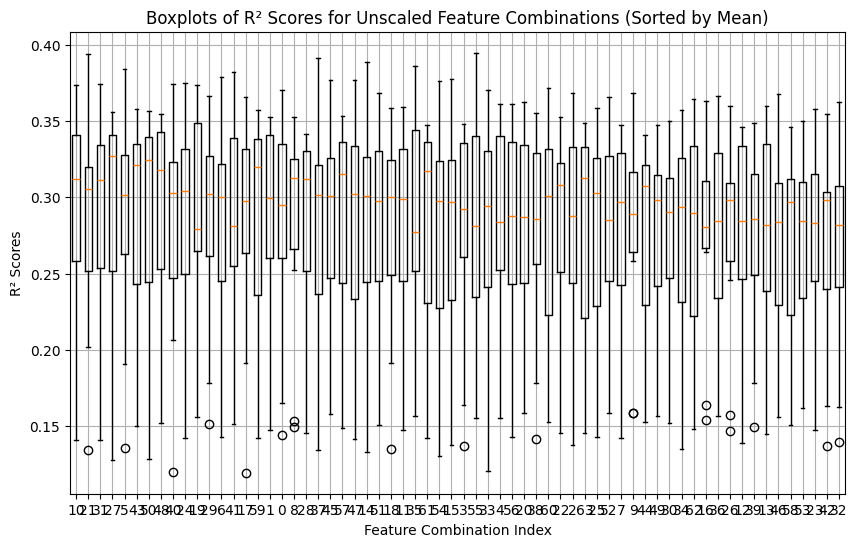

In [26]:
results = loaded_r2_scores_dict

sorted_r2_scores = sorted(loaded_r2_scores_dict.items(), key=lambda item: np.mean(item[1]), reverse=True)

# Create boxplots for each feature combination sorted by mean R² score
plt.figure(figsize=(10, 6))

for i, (key, r2_scores) in enumerate(sorted_r2_scores):
    plt.boxplot(r2_scores, positions=[i], widths=0.6)

plt.xlabel('Feature Combination Index')
plt.ylabel('R² Scores')
plt.title('Boxplots of R² Scores for Unscaled Feature Combinations (Sorted by Mean)')
plt.xticks(range(len(sorted_r2_scores)), [key for key, _ in sorted_r2_scores])
plt.grid(True)
plt.show()




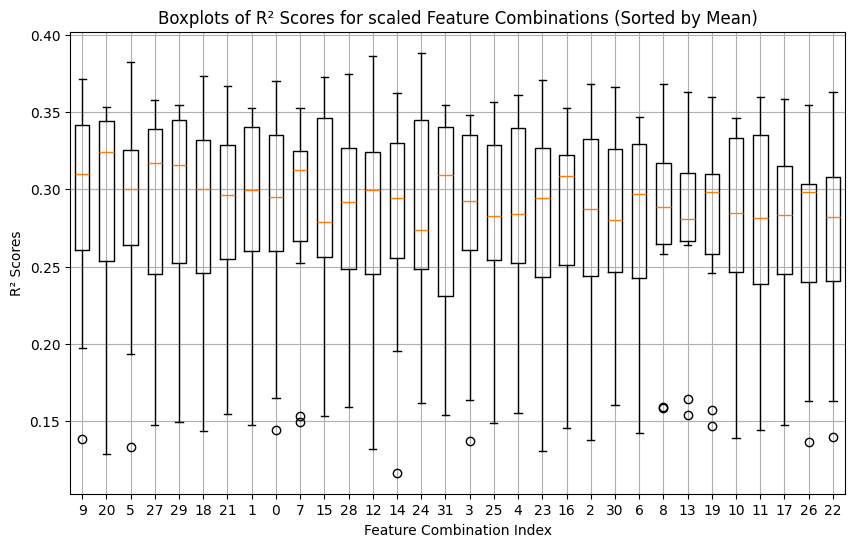

In [28]:
results_scaled = loaded_r2_scores_dict_scaled

sorted_r2_scores_scaled = sorted(results_scaled.items(), key=lambda item: np.mean(item[1]), reverse=True)

# Create boxplots for each feature combination sorted by mean R² score
plt.figure(figsize=(10, 6))

for i, (key, r2_scores) in enumerate(sorted_r2_scores_scaled):
    plt.boxplot(r2_scores, positions=[i], widths=0.6)

plt.xlabel('Feature Combination Index')
plt.ylabel('R² Scores')
plt.title('Boxplots of R² Scores for scaled Feature Combinations (Sorted by Mean)')
plt.xticks(range(len(sorted_r2_scores_scaled)), [key for key, _ in sorted_r2_scores_scaled])
plt.grid(True)
plt.show()

In [30]:
train_set_whole = pd.read_csv('../../data/train_set_with_feat_cleanCorr.csv')


data = train_set_whole

posibble_preds = list(data)
items_to_remove = ['id', 'mean_gs', 'sd', 'skewness', 'kurtosis', 'current_max', 'current_min','sample_type','y_im', 'x_im', 'x_m', 'y_m', 'current_mean', 'current_range', 'gebco', 'x', 'y',  'shore_dist', 'island_dist']
#remove "base" as well
updated_list = [item for item in posibble_preds if item not in items_to_remove]

#data['current_range'] = data['current_max'] - data['current_min']


predictors_B = ['current_mean', 'current_range', 'gebco']
response = 'mean_gs'

import itertools

combinations = []
for r in range(0, len(updated_list) + 1):
    combinations.extend(itertools.combinations(updated_list, r))

# Add each combination to A
pred_result = [predictors_B + list(comb) for comb in combinations]


In [32]:
print(len(sorted_r2_scores))
top_pred = 10

#Sorted r2 score to sorted comb:
sorted_pred = dict()
for j in range(top_pred):
    sorted_pred[j] =pred_result[sorted_r2_scores_scaled[j][0]]

64


['slope', 'comb_dist', 'slope', 'rough', 'comb_dist', 'comb_dist', 'slope', 'aspect', 'rough', 'comb_dist', 'slope', 'rough', 'bpi', 'comb_dist', 'slope', 'aspect', 'comb_dist', 'slope', 'bpi', 'comb_dist', 'slope', 'slope', 'rough']
Counter({'slope': 8, 'comb_dist': 7, 'rough': 4, 'aspect': 2, 'bpi': 2})


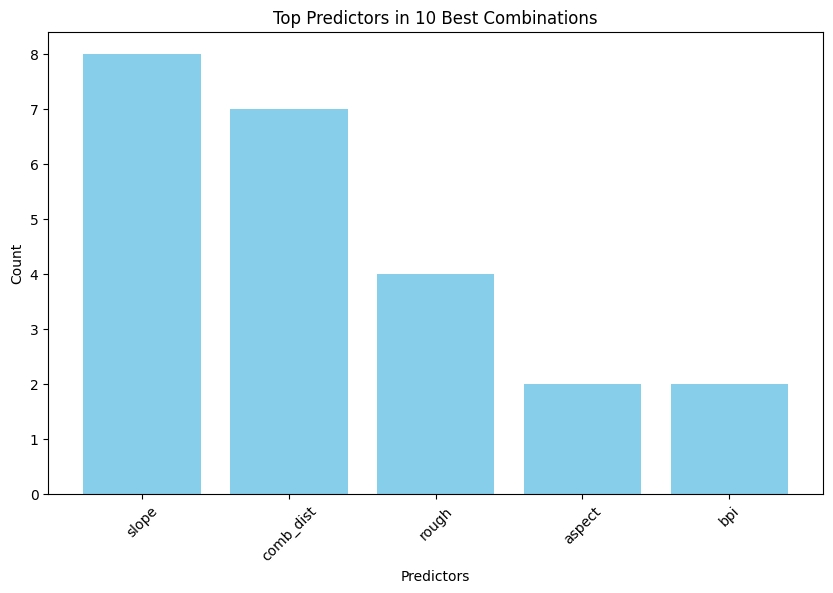

In [34]:
import matplotlib.pyplot as plt
from collections import Counter
#print(sorted_pred.values())

# Flatten the list of combinations

all_predictors = [pred for comb in sorted_pred.values() for pred in comb]
all_pred_clean = [pred for pred in all_predictors if pred not in predictors_B]
print(all_pred_clean)

# Count the occurrences of each predictor
predictor_counts = Counter(all_pred_clean)
print(predictor_counts)

# Separate the predictors and their counts for plotting
predictors, counts = zip(*predictor_counts.most_common())

# Plotting the top predictors
plt.figure(figsize=(10, 6))
plt.bar(predictors, counts, color='skyblue')
plt.xlabel('Predictors')
plt.ylabel('Count')
plt.title(f'Top Predictors in {top_pred} Best Combinations')
plt.xticks(rotation=45)
plt.show()
